In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.dates as mdates
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Embedding, SpatialDropout1D, Bidirectional, LSTM, Dense, Dropout
from keras.models import Sequential
from IPython.display import Image, display
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from keras.utils import plot_model
import plotly.graph_objects as go
from datetime import timedelta


In [2]:
file_path = r'C:\Users\Vinitha\Desktop\Capstone_project\Main\Stocks_data\aus\ANZ.AX.csv'
data = pd.read_csv(file_path)

In [3]:
# Display the first few rows of the dataset
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,tickers
127,2024-10-24,31.450000762939453,31.899999618530273,31.270000457763672,31.709999084472656,31.709999084472656,4274052,ANZ.AX
128,2024-10-25,31.729999542236328,31.950000762939453,31.690000534057617,31.709999084472656,31.709999084472656,2506125,ANZ.AX
129,2024-10-28,31.709999084472656,31.709999084472656,31.350000381469727,31.450000762939453,31.450000762939453,2673901,ANZ.AX
130,2024-10-29,31.43000030517578,31.65999984741211,31.40999984741211,31.559999465942383,31.559999465942383,4161959,ANZ.AX
131,2024-10-30,31.68000030517578,31.68000030517578,31.06999969482422,31.219999313354492,31.219999313354492,2856405,ANZ.AX


In [4]:
# Remove row 1
data = data.drop(index=0)

In [5]:
# Display basic information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131 entries, 1 to 131
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       131 non-null    object
 1   Open       131 non-null    object
 2   High       131 non-null    object
 3   Low        131 non-null    object
 4   Close      131 non-null    object
 5   Adj Close  131 non-null    object
 6   Volume     131 non-null    object
 7   tickers    131 non-null    object
dtypes: object(8)
memory usage: 8.3+ KB


In [6]:
# Display the first few rows of the dataset
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,tickers
1,2024-04-30,27.969999313354492,28.170000076293945,27.959999084472656,28.15999984741211,27.356534957885742,2814971,ANZ.AX
2,2024-05-01,27.8700008392334,28.079999923706055,27.850000381469727,28.079999923706055,27.278818130493164,2272152,ANZ.AX
3,2024-05-02,28.200000762939453,28.6299991607666,28.09000015258789,28.229999542236328,27.424537658691406,4190758,ANZ.AX
4,2024-05-03,28.43000030517578,28.610000610351562,28.290000915527344,28.479999542236328,27.667404174804688,2774301,ANZ.AX
5,2024-05-06,28.799999237060547,28.90999984741211,28.59000015258789,28.770000457763672,27.94913101196289,4061179,ANZ.AX


In [7]:
# Summary statistics
data.describe()

,Date,Open,High,Low,Close,Adj Close,Volume,tickers
count,131,131,131,131,131,131,131,131
unique,131,106,117,119,112,112,131,1
top,2024-04-30,28.43000030517578,29.049999237060547,27.989999771118164,31.149999618530273,31.149999618530273,2814971,ANZ.AX
freq,1,3,3,3,3,3,1,131


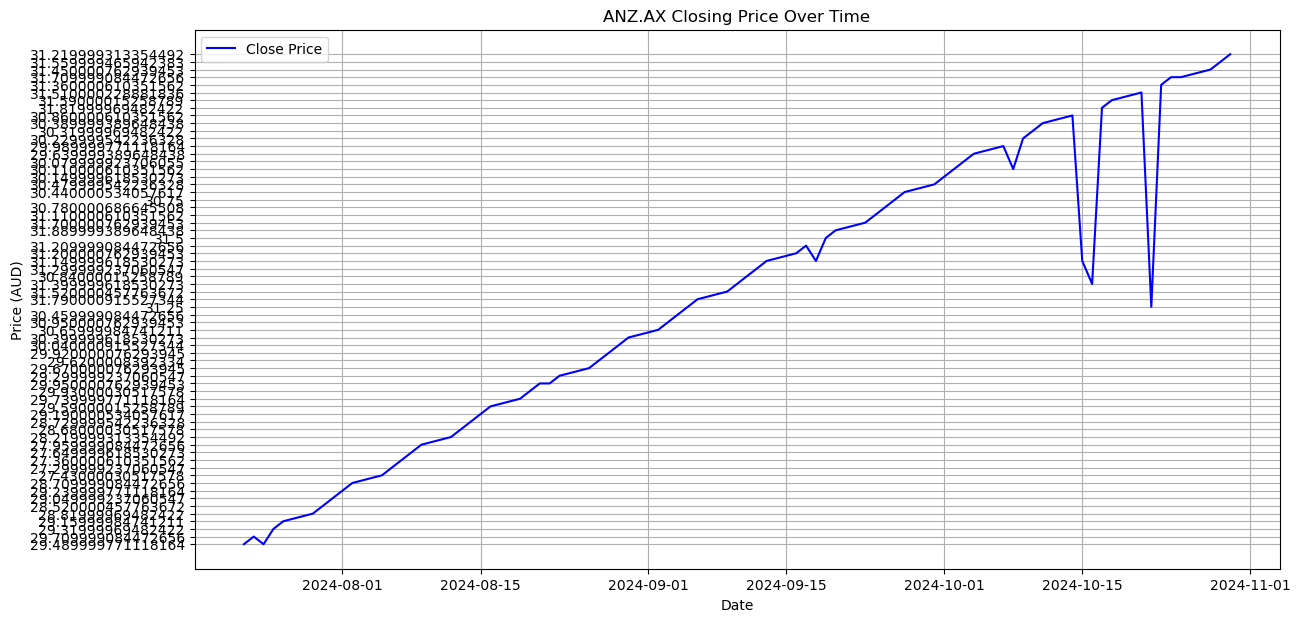

In [8]:
# Visualize Closing Price (6 MONTHS)

# Visualize Closing Price (1 MONTH)
data['Date'] = pd.to_datetime(data['Date'])

# Filter the last 30 days
last_100_days = data[data['Date'] >= (data['Date'].max() - pd.Timedelta(days=100))]


plt.figure(figsize=(14, 7))
plt.plot(last_100_days['Date'], last_100_days['Close'], label='Close Price', color='blue')
plt.title('ANZ.AX Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price (AUD)')
plt.legend()
plt.grid()
plt.show()

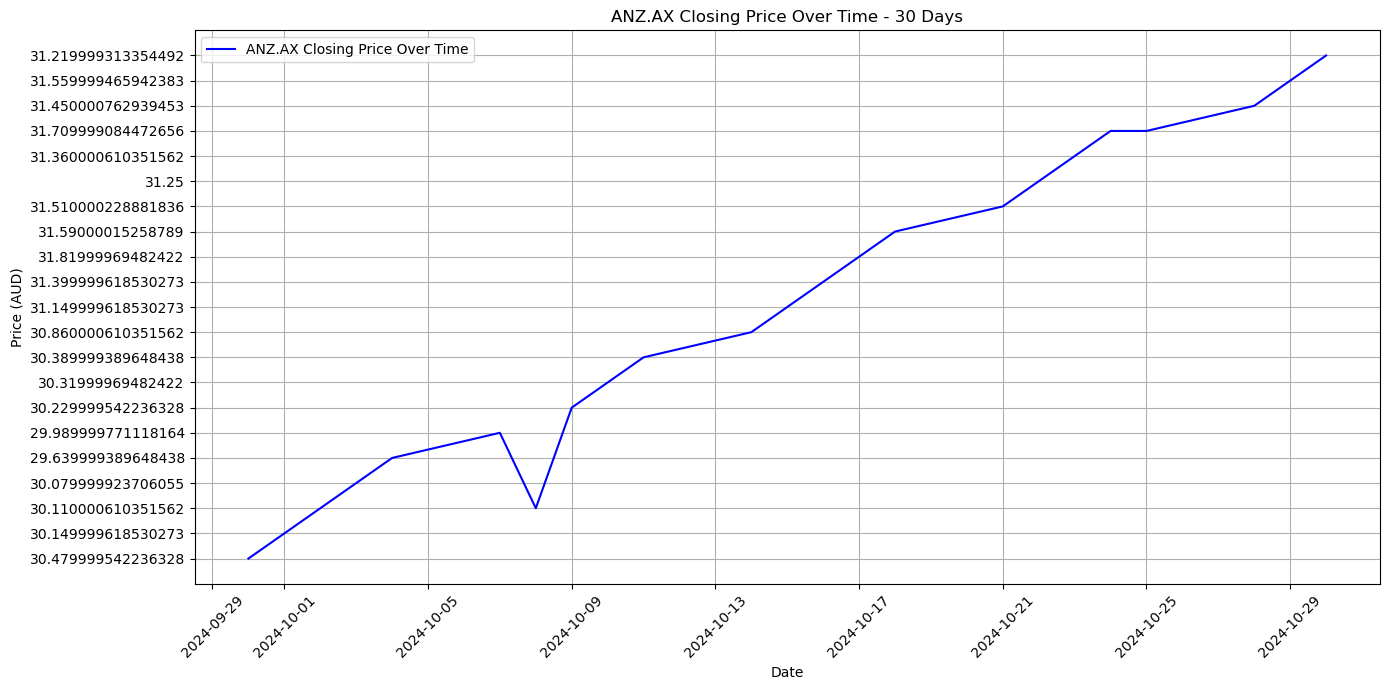

In [9]:
# Visualize Closing Price (1 MONTH)
data['Date'] = pd.to_datetime(data['Date'])

# Filter the last 30 days
last_30_days = data[data['Date'] >= (data['Date'].max() - pd.Timedelta(days=30))]

# Visualize volume of stock being traded each day
plt.figure(figsize=(14, 7))
plt.plot(last_30_days['Date'], last_30_days['Close'], label='ANZ.AX Closing Price Over Time', color='blue')
plt.title(f'ANZ.AX Closing Price Over Time - 30 Days')
plt.xlabel('Date')
plt.ylabel('Price (AUD)')
plt.legend()
plt.grid()
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()

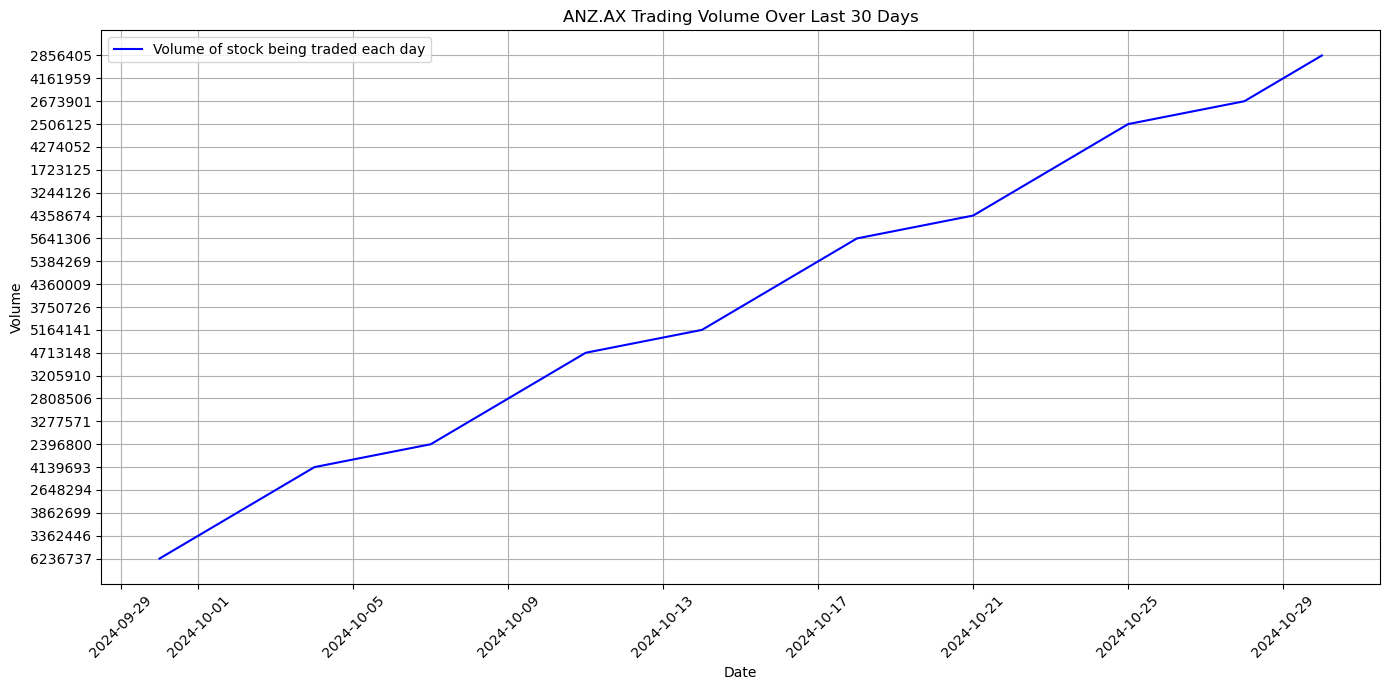

In [10]:
# Convert 'Date' to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Filter the last 30 days
last_30_days = data[data['Date'] >= (data['Date'].max() - pd.Timedelta(days=30))]

# Visualize volume of stock being traded each day
plt.figure(figsize=(14, 7))
plt.plot(last_30_days['Date'], last_30_days['Volume'], label='Volume of stock being traded each day', color='blue')
plt.title(f'ANZ.AX Trading Volume Over Last 30 Days')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.grid()
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()

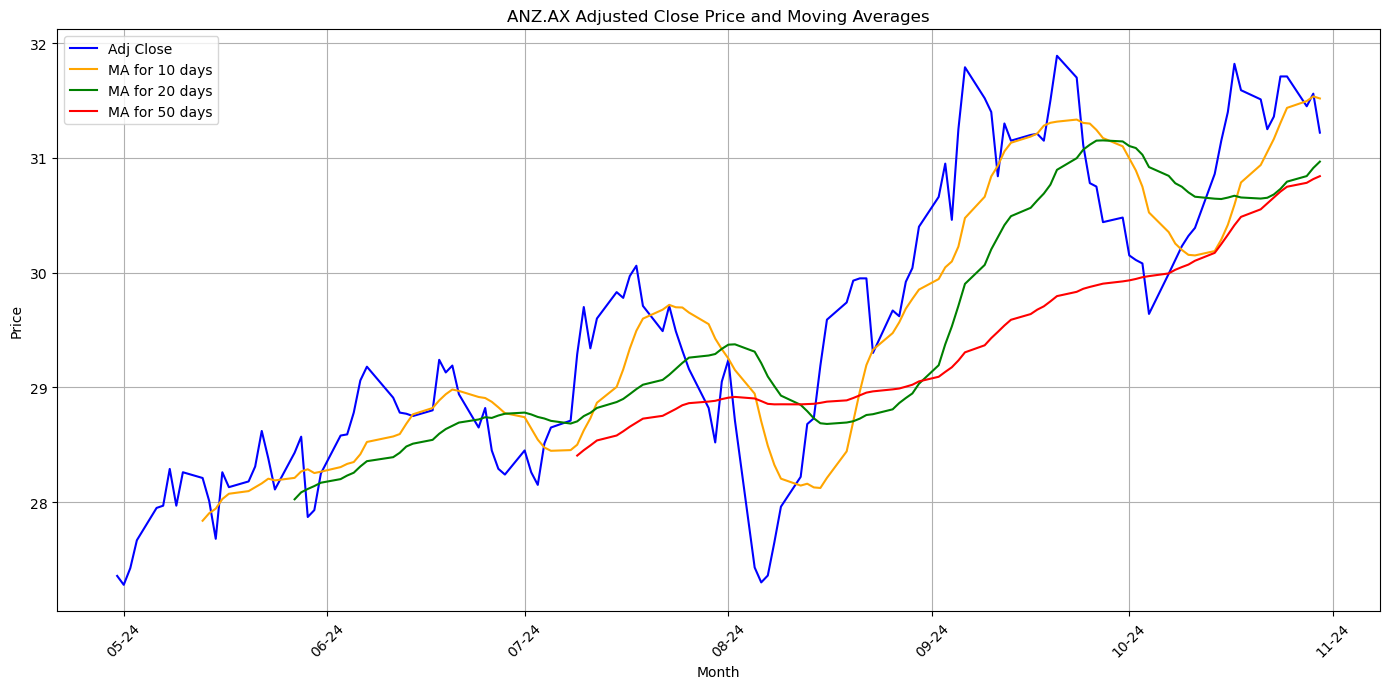

In [11]:
# Convert 'Date' to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Convert 'Adj Close' to numeric, forcing errors to NaN
data['Adj Close'] = pd.to_numeric(data['Adj Close'], errors='coerce')

# Drop rows with NaN in 'Adj Close'
data.dropna(subset=['Adj Close'], inplace=True)

# Calculate moving averages
ma_days = [10, 20, 50]
for ma in ma_days:
    column_name = f"MA for {ma} days"
    data[column_name] = data['Adj Close'].rolling(ma).mean()

# Create subplots for visualization
plt.figure(figsize=(14, 7))

# Plot ANZ.AX data
plt.plot(data['Date'], data['Adj Close'], label='Adj Close', color='blue')
plt.plot(data['Date'], data['MA for 10 days'], label='MA for 10 days', color='orange')
plt.plot(data['Date'], data['MA for 20 days'], label='MA for 20 days', color='green')
plt.plot(data['Date'], data['MA for 50 days'], label='MA for 50 days', color='red')

# Title and labels
plt.title('ANZ.AX Adjusted Close Price and Moving Averages')
plt.xlabel('Month')
plt.ylabel('Price')
plt.legend()
plt.grid()

# Format x-axis to show only month numbers
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%y'))

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)  
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()

In [12]:
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,tickers,MA for 10 days,MA for 20 days,MA for 50 days
127,2024-10-24,31.450000762939453,31.899999618530273,31.270000457763672,31.709999084472656,31.709999,4274052,ANZ.AX,31.304,30.7295,30.7062
128,2024-10-25,31.729999542236328,31.950000762939453,31.690000534057617,31.709999084472656,31.709999,2506125,ANZ.AX,31.436,30.7930,30.7486
129,2024-10-28,31.709999084472656,31.709999084472656,31.350000381469727,31.450000762939453,31.450001,2673901,ANZ.AX,31.495,30.8415,30.7828
130,2024-10-29,31.43000030517578,31.65999984741211,31.40999984741211,31.559999465942383,31.559999,4161959,ANZ.AX,31.536,30.9120,30.8154
131,2024-10-30,31.68000030517578,31.68000030517578,31.06999969482422,31.219999313354492,31.219999,2856405,ANZ.AX,31.518,30.9675,30.8408


#### Interpretation of the ANZ.AX Chart

#### Adjusted Close Prices
- The **blue line** represents the adjusted close prices over time.
- Look for overall trends, such as whether the price is generally increasing, decreasing, or remaining stable over the period shown.

#### Moving Averages
- The **orange**, **green**, and **red lines** represent the 10-day, 20-day, and 50-day moving averages, respectively.

##### Short-Term Trends
- The **10-day moving average** (orange) reacts more quickly to price changes and is useful for identifying short-term trends.

##### Medium-Term Trends
- The **20-day moving average** (green) smooths out more fluctuations and provides a clearer picture of medium-term trends.

##### Long-Term Trends
- The **50-day moving average** (red) helps identify longer-term trends and is less sensitive to short-term price fluctuations.

#### Additional Insights
- **Crossovers**: Points where moving averages cross may indicate potential buy/sell signals.
- **Volatility**: Sudden changes in the adjusted close price can indicate increased volatility and may require further investigation.
- **Trends Over Time**: Analyze how price and moving averages change over the months for consistent patterns or anomalies.


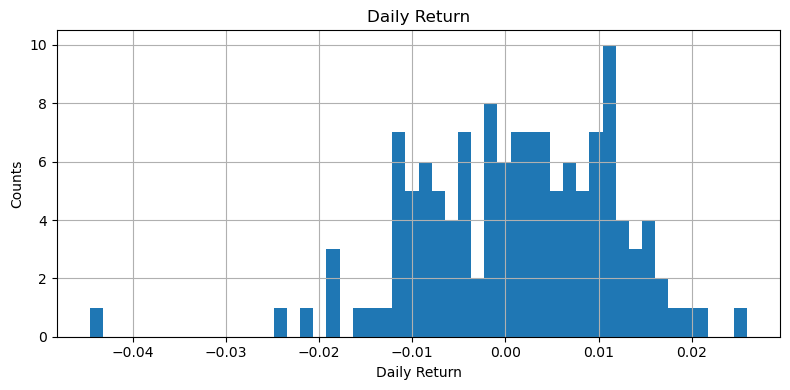

In [13]:
# Average daily return using a histogram
data['Daily Return'] = data['Adj Close'].pct_change()

plt.figure(figsize=(8, 4))
data['Daily Return'].hist(bins=50)
plt.xlabel('Daily Return')
plt.ylabel('Counts')
plt.title(f'Daily Return')
    
plt.tight_layout()

In [14]:
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,tickers,MA for 10 days,MA for 20 days,MA for 50 days,Daily Return
127,2024-10-24,31.450000762939453,31.899999618530273,31.270000457763672,31.709999084472656,31.709999,4274052,ANZ.AX,31.304,30.7295,30.7062,0.011161
128,2024-10-25,31.729999542236328,31.950000762939453,31.690000534057617,31.709999084472656,31.709999,2506125,ANZ.AX,31.436,30.7930,30.7486,0.000000
129,2024-10-28,31.709999084472656,31.709999084472656,31.350000381469727,31.450000762939453,31.450001,2673901,ANZ.AX,31.495,30.8415,30.7828,-0.008199
130,2024-10-29,31.43000030517578,31.65999984741211,31.40999984741211,31.559999465942383,31.559999,4161959,ANZ.AX,31.536,30.9120,30.8154,0.003498
131,2024-10-30,31.68000030517578,31.68000030517578,31.06999969482422,31.219999313354492,31.219999,2856405,ANZ.AX,31.518,30.9675,30.8408,-0.010773


In [15]:
# Convert 'Date' to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Filter the last 30 days
last_100_days = data[data['Date'] >= (data['Date'].max() - pd.Timedelta(days=100))]

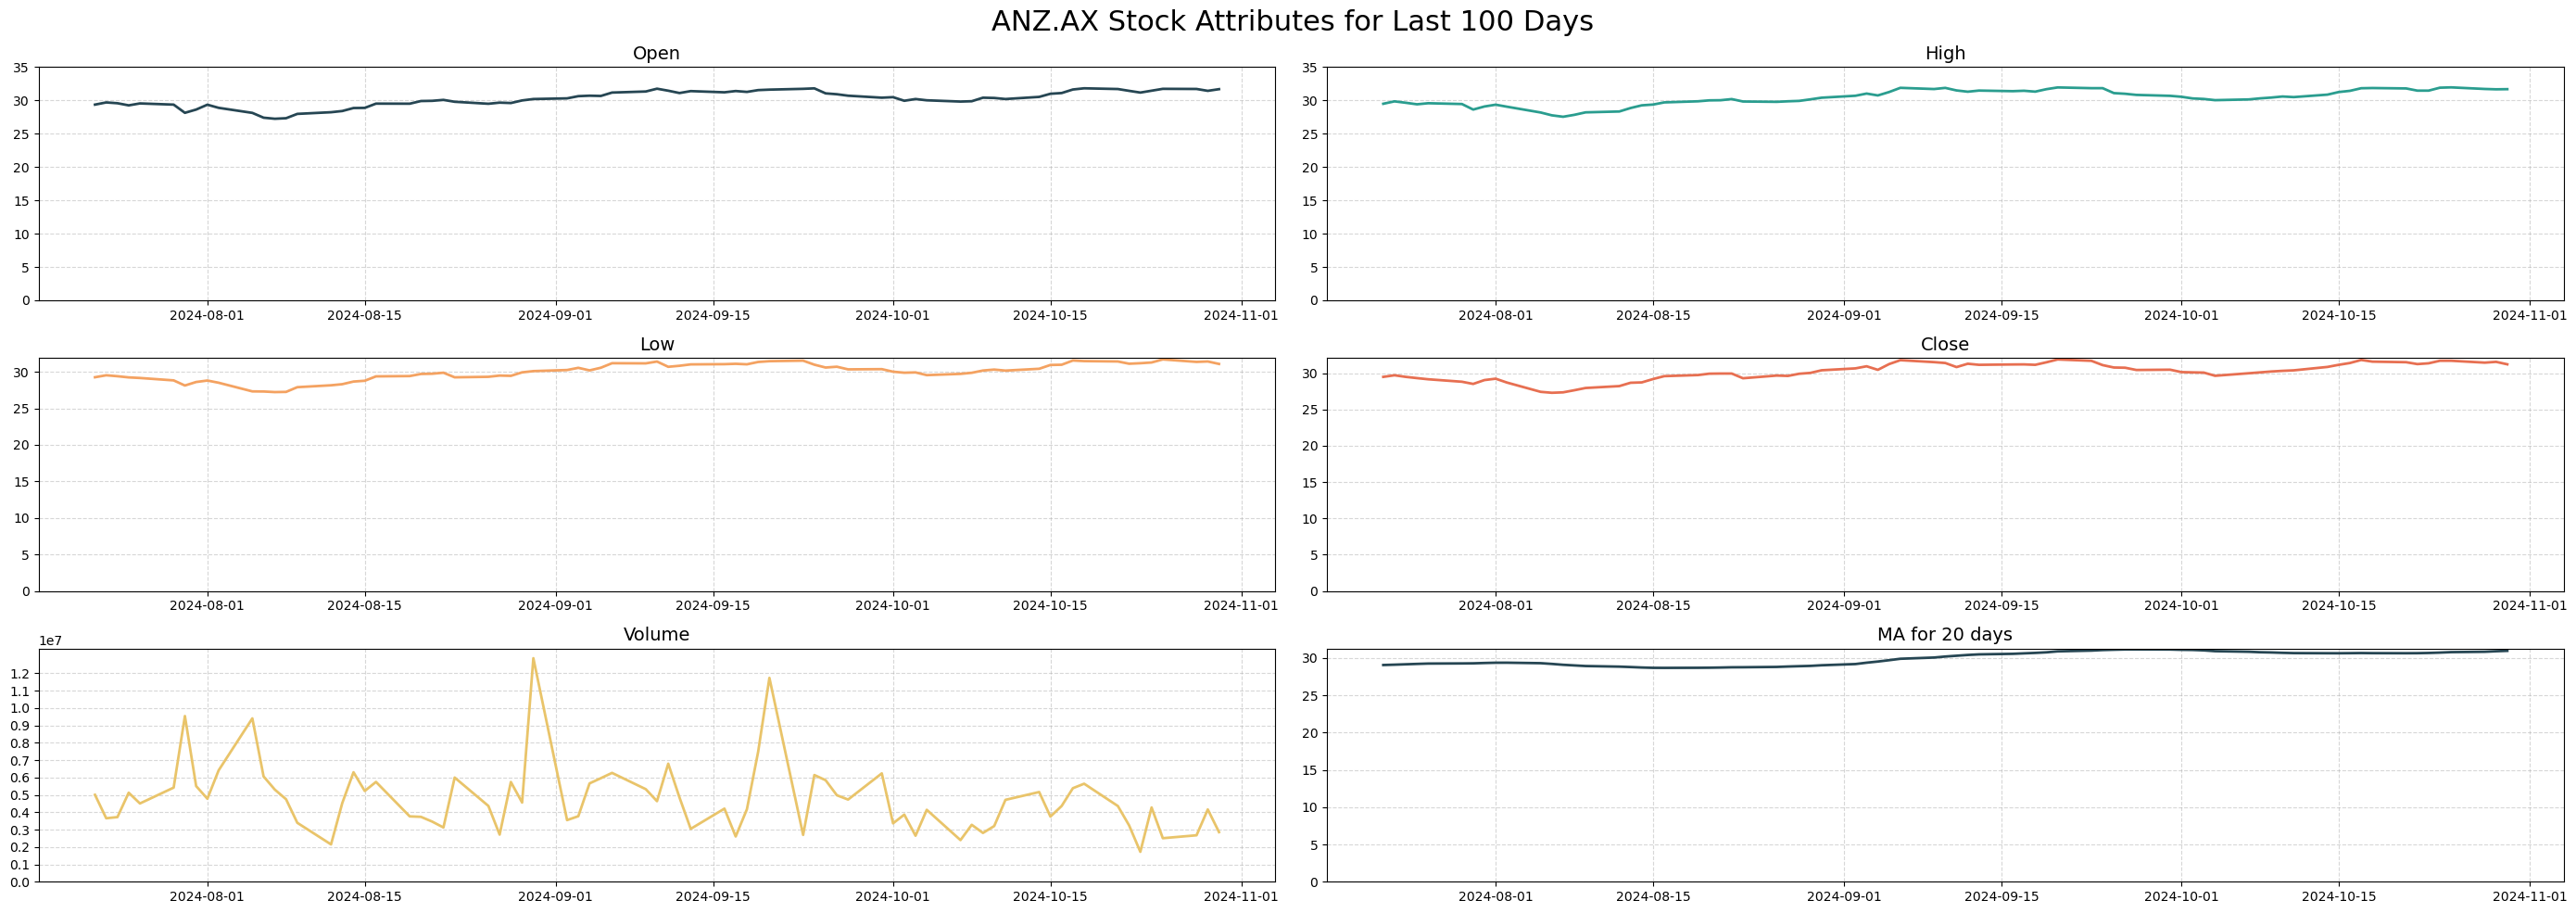

In [16]:
# Ensure the relevant columns are numeric using .loc
last_100_days.loc[:, 'Open'] = pd.to_numeric(last_100_days['Open'], errors='coerce')
last_100_days.loc[:, 'High'] = pd.to_numeric(last_100_days['High'], errors='coerce')
last_100_days.loc[:, 'Low'] = pd.to_numeric(last_100_days['Low'], errors='coerce')
last_100_days.loc[:, 'Close'] = pd.to_numeric(last_100_days['Close'], errors='coerce')
last_100_days.loc[:, 'Volume'] = pd.to_numeric(last_100_days['Volume'], errors='coerce')
last_100_days.loc[:, 'MA for 20 days'] = pd.to_numeric(last_100_days['MA for 20 days'], errors='coerce')

colors = ['#264653', '#2a9d8f', '#f4a261', '#e76f51', '#e9c46a', '#e9d8a6']
plt.figure(figsize=(28, 10))

# Open plot
plt.subplot(3, 2, 1)
plt.plot(last_100_days['Date'], last_100_days['Open'], color=colors[0], linewidth=2)
plt.title('Open', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)
plt.ylim(bottom=0)  # Set a lower limit for the y-axis
plt.yticks(range(0, int(last_100_days['Open'].max()) + 5, 5))

# High plot
plt.subplot(3, 2, 2)
plt.plot(last_100_days['Date'], last_100_days['High'], color=colors[1], linewidth=2)
plt.title('High', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)
plt.ylim(bottom=0)
plt.yticks(range(0, int(last_100_days['High'].max()) + 5, 5))

# Low plot
plt.subplot(3, 2, 3)
plt.plot(last_100_days['Date'], last_100_days['Low'], color=colors[2], linewidth=2)
plt.title('Low', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)
plt.ylim(bottom=0)
plt.yticks(range(0, int(last_100_days['Low'].max()) + 1, 5))

# Close plot
plt.subplot(3, 2, 4)
plt.plot(last_100_days['Date'], last_100_days['Close'], color=colors[3], linewidth=2)
plt.title('Close', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)
plt.ylim(bottom=0)
plt.yticks(range(0, int(last_100_days['Close'].max()) + 1, 5))

# Volume plot
plt.subplot(3, 2, 5)
plt.plot(last_100_days['Date'], last_100_days['Volume'], color=colors[4], linewidth=2)
plt.title('Volume', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)
plt.ylim(bottom=0)
plt.yticks(range(0, int(last_100_days['Volume'].max()) + 1, 1000000))  # Adjust as needed

# MA for 20 days plot
plt.subplot(3, 2, 6)
plt.plot(last_100_days['Date'], last_100_days['MA for 20 days'], color=colors[0], linewidth=2)
plt.title('MA for 20 days', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)
plt.ylim(bottom=0)
plt.yticks(range(0, int(last_100_days['MA for 20 days'].max()) + 1, 5))

plt.suptitle('ANZ.AX Stock Attributes for Last 100 Days', fontsize=22, y=0.98)
plt.tight_layout()
plt.show()

In [17]:
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,tickers,MA for 10 days,MA for 20 days,MA for 50 days,Daily Return
127,2024-10-24,31.450000762939453,31.899999618530273,31.270000457763672,31.709999084472656,31.709999,4274052,ANZ.AX,31.304,30.7295,30.7062,0.011161
128,2024-10-25,31.729999542236328,31.950000762939453,31.690000534057617,31.709999084472656,31.709999,2506125,ANZ.AX,31.436,30.7930,30.7486,0.000000
129,2024-10-28,31.709999084472656,31.709999084472656,31.350000381469727,31.450000762939453,31.450001,2673901,ANZ.AX,31.495,30.8415,30.7828,-0.008199
130,2024-10-29,31.43000030517578,31.65999984741211,31.40999984741211,31.559999465942383,31.559999,4161959,ANZ.AX,31.536,30.9120,30.8154,0.003498
131,2024-10-30,31.68000030517578,31.68000030517578,31.06999969482422,31.219999313354492,31.219999,2856405,ANZ.AX,31.518,30.9675,30.8408,-0.010773


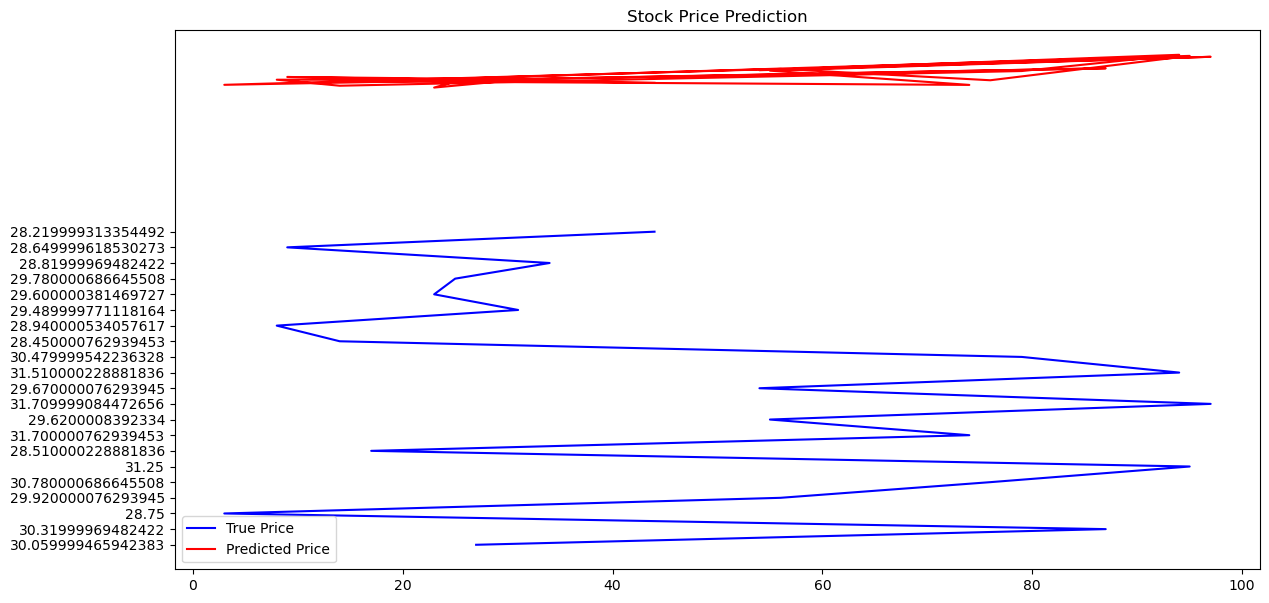

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np

# Prepare the data for regression
data['Prediction'] = data['Close'].shift(-30)  # Predicting 30 days into the future
X = data[['Close']][:-30]  # Features
y = data['Prediction'][:-30]  # Target

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# Plotting the predictions
plt.figure(figsize=(14,7))
plt.plot(y_test.index, y_test, label='True Price', color='blue')
plt.plot(y_test.index, predictions, label='Predicted Price', color='red')
plt.title('Stock Price Prediction')
plt.legend()
plt.show()


In [19]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate accuracy metrics
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R²): {r2}')


Mean Absolute Error (MAE): 0.6793948279560473
Mean Squared Error (MSE): 0.734262860734546
R-squared (R²): 0.36662203996947373


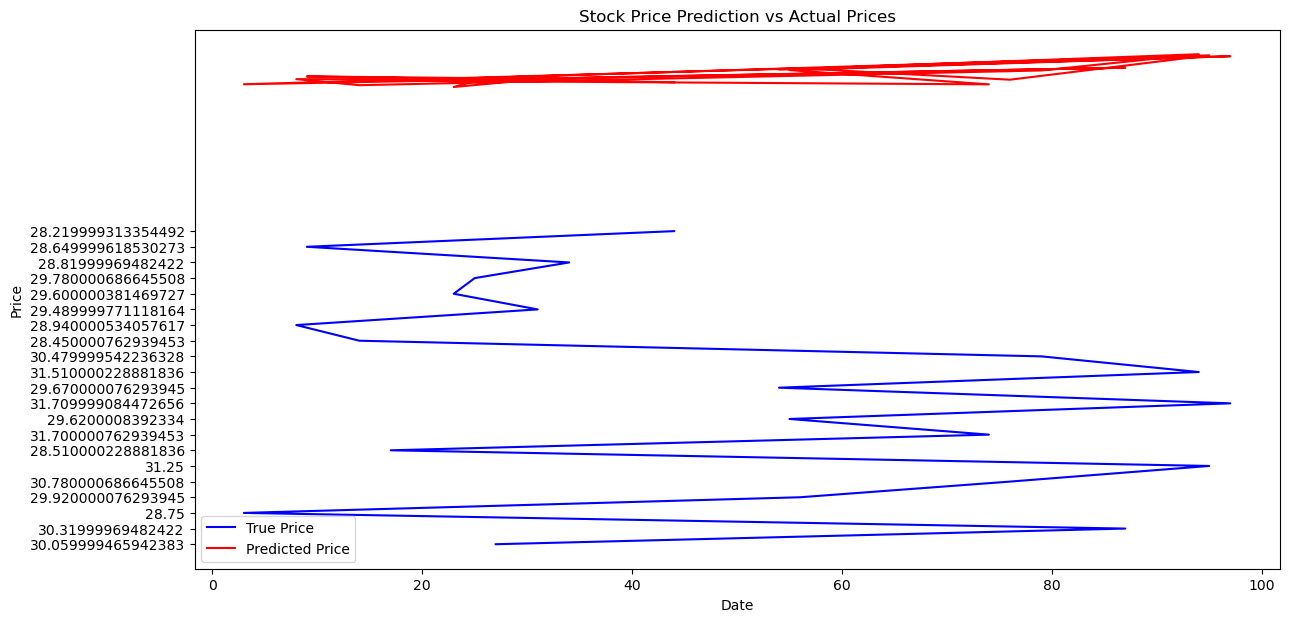

In [20]:
plt.figure(figsize=(14,7))
plt.plot(y_test.index, y_test, label='True Price', color='blue')
plt.plot(y_test.index, predictions, label='Predicted Price', color='red')
plt.title('Stock Price Prediction vs Actual Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [21]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
mean_cv_score = -cv_scores.mean()

print(f'Cross-validated Mean Squared Error: {mean_cv_score}')

Cross-validated Mean Squared Error: 1.8006249573287163


In [22]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [23]:
# Hyperparameter tuning for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}


In [24]:

rf = RandomForestRegressor(random_state=0)
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)



GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=0),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='neg_mean_squared_error')

In [29]:
# Best model
best_rf = grid_search.best_estimator_



In [30]:
# Make predictions
predictions = best_rf.predict(X_test)



In [31]:
# Calculate accuracy metrics
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R²): {r2}')



Mean Absolute Error (MAE): 0.516178674954627
Mean Squared Error (MSE): 0.6658547583362627
R-squared (R²): 0.42563113148642606


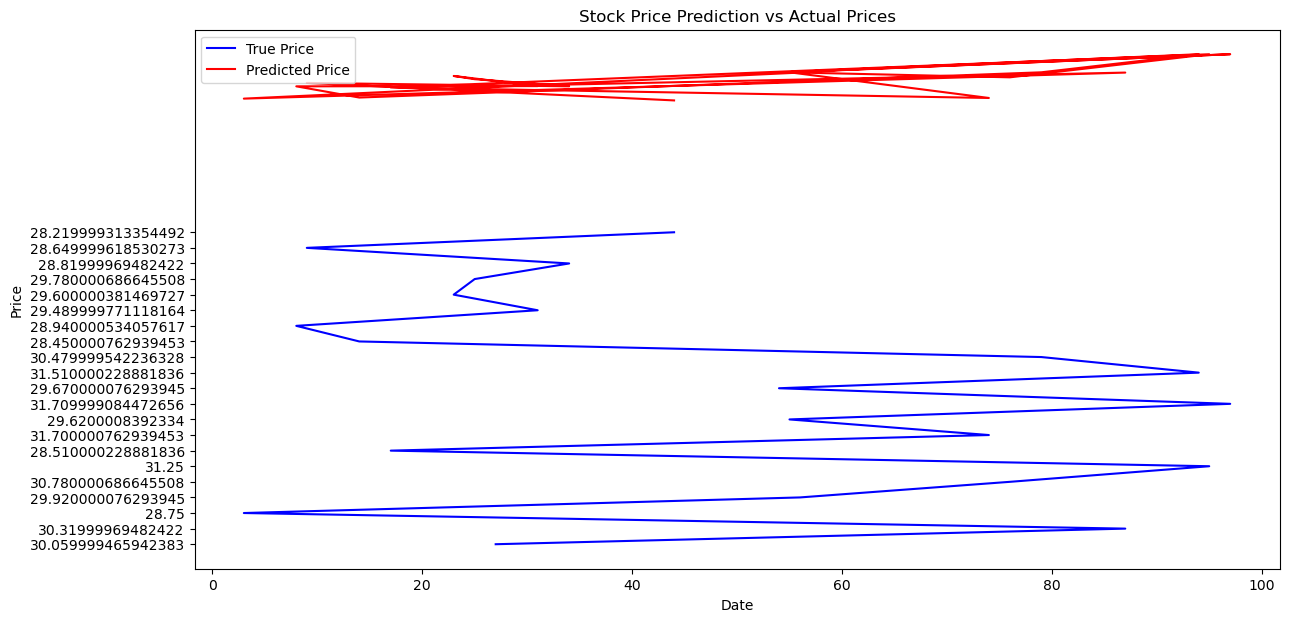

In [32]:
# Plot the results
plt.figure(figsize=(14,7))
plt.plot(y_test.index, y_test, label='True Price', color='blue')
plt.plot(y_test.index, predictions, label='Predicted Price', color='red')
plt.title('Stock Price Prediction vs Actual Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [33]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [34]:
# Define the stock symbol and time period
symbol = 'ANZ.AX'
data = yf.download(symbol, start='2020-01-01', end='2024-10-30')

# Use only the 'Close' prices
data = data[['Close']]
print(data.head())


[*********************100%***********************]  1 of 1 completed

Price                          Close
Ticker                        ANZ.AX
Date                                
2020-01-02 00:00:00+00:00  24.355721
2020-01-03 00:00:00+00:00  24.534298
2020-01-06 00:00:00+00:00  24.435087
2020-01-07 00:00:00+00:00  24.752556
2020-01-08 00:00:00+00:00  24.663267


In [35]:
# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Create sequences for training
def create_dataset(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

# Set time step
time_step = 60
X, y = create_dataset(scaled_data, time_step)

# Reshape X for LSTM [samples, time steps, features]
X = X.reshape(X.shape[0], X.shape[1], 1)

# Split into training and testing sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]


In [36]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1))  # Output layer

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')


C:\Users\Vinitha\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [37]:
# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32)

Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.1515
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0092
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0069
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0055
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0064
Epoch 6/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0062
Epoch 7/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0059
Epoch 8/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0047
Epoch 9/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0048
Epoch 10/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0049
Epoch 11/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0040
Epoch 12/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0048
Epoch 13/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0044
Epoch 14/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0046
Epoch 15/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0040
Epoc

In [33]:
# Predict on test data
predicted_prices = model.predict(X_test)

# Inverse transform to get actual prices
predicted_prices = scaler.inverse_transform(predicted_prices)
actual_prices = scaler.inverse_transform(y_test.reshape(-1, 1))


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


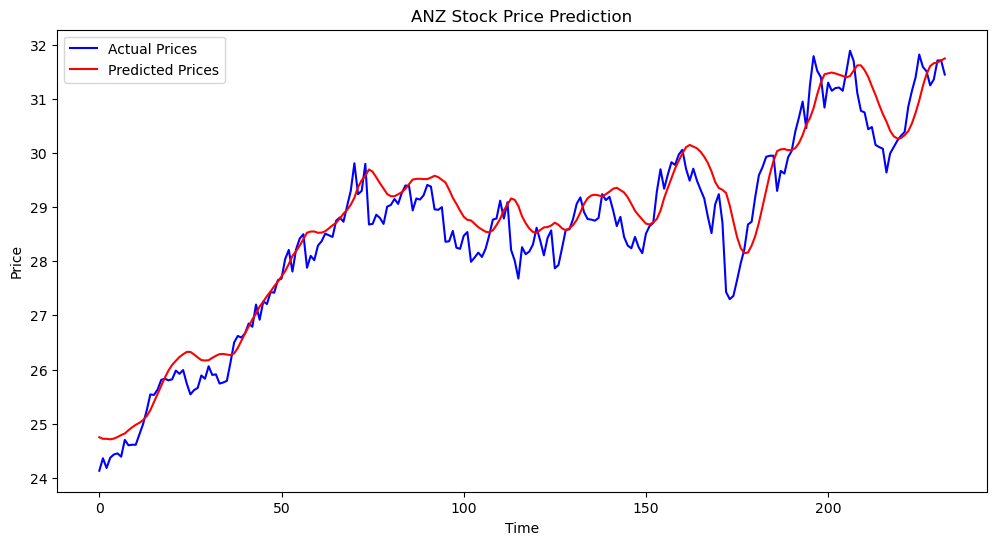

In [34]:
# Plotting
plt.figure(figsize=(12, 6))
plt.plot(actual_prices, label='Actual Prices', color='blue')
plt.plot(predicted_prices, label='Predicted Prices', color='red')
plt.title('ANZ Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [35]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Calculate MAE, MSE, and RMSE
mae = mean_absolute_error(actual_prices, predicted_prices)
mse = mean_squared_error(actual_prices, predicted_prices)
rmse = np.sqrt(mse)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')


Mean Absolute Error (MAE): 0.3928506057149863
Mean Squared Error (MSE): 0.2559799158422873
Root Mean Squared Error (RMSE): 0.5059445778366315


In [36]:
# Define your buy/sell/hold strategy
def get_trade_signals(actual_prices, predicted_prices, buy_threshold=0.02, sell_threshold=0.02):
    signals = []
    for actual, predicted in zip(actual_prices, predicted_prices):
        if predicted > actual * (1 + buy_threshold):
            signals.append('Buy')
        elif predicted < actual * (1 - sell_threshold):
            signals.append('Sell')
        else:
            signals.append('Hold')
    return signals

# Generate trade signals based on actual and predicted prices
trade_signals = get_trade_signals(actual_prices.flatten(), predicted_prices.flatten())

# Create a DataFrame to display the results
signals_df = pd.DataFrame({
    'Actual Price': actual_prices.flatten(),
    'Predicted Price': predicted_prices.flatten(),
    'Signal': trade_signals
})

# Display the trade signals
print(signals_df.tail(20))  # Show the last 20 entries


     Actual Price  Predicted Price Signal
213     30.150000        31.072933    Buy
214     30.110001        30.890718    Buy
215     30.080000        30.722231    Buy
216     29.639999        30.580843    Buy
217     29.990000        30.413321   Hold
218     30.110001        30.309423   Hold
219     30.230000        30.266340   Hold
220     30.320000        30.278135   Hold
221     30.389999        30.329885   Hold
222     30.860001        30.405394   Hold
223     31.150000        30.548460   Hold
224     31.400000        30.743200   Sell
225     31.820000        30.970787   Sell
226     31.590000        31.240734   Hold
227     31.510000        31.457220   Hold
228     31.250000        31.605745   Hold
229     31.360001        31.659592   Hold
230     31.709999        31.672834   Hold
231     31.709999        31.709021   Hold
232     31.450001        31.746778   Hold


In [37]:
import yfinance as yf
import datetime

# Fetch news for ANZ (ticker symbol for Australia and New Zealand Banking Group)
anz_news = yf.Ticker("ANZ.AX").news

# Display the news with formatted dates
for article in anz_news:
    title = article['title']
    link = article['link']
    publish_time = datetime.datetime.fromtimestamp(article['providerPublishTime'])
    formatted_date = publish_time.strftime("%Y-%m-%d")
    
    print(f"Title: {title}")
    print(f"Link: {link}")
    print(f"Published on: {formatted_date}")
    print()


Title: Q3 2024 Kimco Realty Corp Earnings Call
Link: https://finance.yahoo.com/news/q3-2024-kimco-realty-corp-052918128.html
Published on: 2024-11-01

Title: Q3 2024 Xylem Inc Earnings Call
Link: https://finance.yahoo.com/news/q3-2024-xylem-inc-earnings-052819320.html
Published on: 2024-11-01

Title: Ontario Lottery and Gaming Corporation - EVENING LOTTERY WINNING NUMBERS - Oct. 31, 2024
Link: https://finance.yahoo.com/news/ontario-lottery-gaming-corporation-evening-052400353.html
Published on: 2024-11-01

Title: Q3 2024 Antero Resources Corp Earnings Call
Link: https://finance.yahoo.com/news/q3-2024-antero-resources-corp-052149286.html
Published on: 2024-11-01

Title: Calculating The Fair Value Of Prolintas Infra Business Trust (KLSE:PLINTAS)
Link: https://finance.yahoo.com/news/calculating-fair-value-prolintas-infra-052104095.html
Published on: 2024-11-01

Title: Q3 2024 Borgwarner Inc Earnings Call
Link: https://finance.yahoo.com/news/q3-2024-borgwarner-inc-earnings-052048224.html
P

[*********************100%***********************]  1 of 1 completed

                Close
Date                 
2020-01-02  24.355721
2020-01-03  24.534298
2020-01-06  24.435087
2020-01-07  24.752556
2020-01-08  24.663267


In [57]:
# Define the stock symbol and time period
symbol = 'AAPL'
data = yf.download(symbol, start='2020-01-01', end='2024-10-30')

# Use only the 'Close' prices
data = data[['Close']]
print(data.head())


# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Create sequences for training
def create_dataset(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

# Set time step
time_step = 60
X, y = create_dataset(scaled_data, time_step)

# Reshape X for LSTM [samples, time steps, features]
X = X.reshape(X.shape[0], X.shape[1], 1)

# Split into training and testing sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1))  # Output layer

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32)

# Predict on test data
predicted_prices = model.predict(X_test)

# Inverse transform to get actual prices
predicted_prices = scaler.inverse_transform(predicted_prices)
actual_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

# Define your buy/sell/hold strategy
def get_trade_signals(actual_prices, predicted_prices, buy_threshold=0.02, sell_threshold=0.02):
    signals = []
    for actual, predicted in zip(actual_prices, predicted_prices):
        if predicted > actual * (1 + buy_threshold):
            signals.append('Buy')
        elif predicted < actual * (1 - sell_threshold):
            signals.append('Sell')
        else:
            signals.append('Hold')
    return signals

# Generate trade signals based on actual and predicted prices
trade_signals = get_trade_signals(actual_prices.flatten(), predicted_prices.flatten())

# Create a DataFrame to display the results
signals_df = pd.DataFrame({
    'Actual Price': actual_prices.flatten(),
    'Predicted Price': predicted_prices.flatten(),
    'Signal': trade_signals
})

# Display the trade signals
print(signals_df.tail(20))  # Show the last 20 entries

[*********************100%***********************]  1 of 1 completed

                Close
Date                 
2020-01-02  75.087502
2020-01-03  74.357498
2020-01-06  74.949997
2020-01-07  74.597504
2020-01-08  75.797501
Epoch 1/50



C:\Users\Vinitha\anaconda3\envs\IOD\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 6s 57ms/step - loss: 0.0723
Epoch 2/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0060
Epoch 3/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0042
Epoch 4/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0037
Epoch 5/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0037
Epoch 6/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.0036
Epoch 7/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0029
Epoch 8/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0031
Epoch 9/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0031
Epoch 10/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0034
Epoch 11/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0031
Epoch 12/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0025
Epoch 13/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0026
Epoch 14/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0025
Epoch 15/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0030
Epoch 16/50
29/

In [64]:
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Define the stock symbols and time period
symbols = ["AAPL", "NVDA", "MSFT", "GOOG", "AMZN", "META", "TSLA", "WMT", "JPM", 
               "XOM", "HD", "PG", "JNJ", "BAC", "KO", "NFLX",
               "AMD", "BABA", "MCD", "CSCO", "IBM", "GE", "VZ", "DIS", "PFE", "T", 
               "C", "INTC", "BA", "F"]

# Download historical data
data = yf.download(symbols, start='2020-01-01', end='2024-10-30')

# Initialize a DataFrame to collect all results
all_signals_df = pd.DataFrame()

# Loop through each stock symbol
for symbol in symbols:
    # Use only the 'Close' prices for the current stock
    stock_data = data['Close'][symbol].dropna().values.reshape(-1, 1)  # Drop NaN values and reshape

    # Normalize the data
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(stock_data)

    # Create sequences for training
    def create_dataset(data, time_step=1):
        X, y = [], []
        for i in range(len(data) - time_step - 1):
            X.append(data[i:(i + time_step), 0])
            y.append(data[i + time_step, 0])
        return np.array(X), np.array(y)

    # Set time step
    time_step = 60
    X, y = create_dataset(scaled_data, time_step)

    # Reshape X for LSTM [samples, time steps, features]
    X = X.reshape(X.shape[0], X.shape[1], 1)

    # Split into training and testing sets
    train_size = int(len(X) * 0.8)
    X_train, X_test = X[:train_size], X[train_size:]
    y_train, y_test = y[:train_size], y[train_size:]

    # Build the LSTM model
    model = Sequential()
    model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
    model.add(Dropout(0.2))
    model.add(LSTM(50, return_sequences=False))
    model.add(Dropout(0.2))
    model.add(Dense(1))  # Output layer

    # Compile the model
    model.compile(optimizer='adam', loss='mean_squared_error')

    # Train the model
    model.fit(X_train, y_train, epochs=50, batch_size=32)

    # Predict on test data
    predicted_prices = model.predict(X_test)

    # Inverse transform to get actual prices
    predicted_prices = scaler.inverse_transform(predicted_prices)
    actual_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

    # Define your buy/sell/hold strategy
    def get_trade_signals(actual_prices, predicted_prices, buy_threshold=0.02, sell_threshold=0.02):
        signals = []
        for actual, predicted in zip(actual_prices, predicted_prices):
            if predicted > actual * (1 + buy_threshold):
                signals.append('Buy')
            elif predicted < actual * (1 - sell_threshold):
                signals.append('Sell')
            else:
                signals.append('Hold')
        return signals

    # Generate trade signals based on actual and predicted prices
    trade_signals = get_trade_signals(actual_prices.flatten(), predicted_prices.flatten())

    # Create a DataFrame to display the results for the current stock
    signals_df = pd.DataFrame({
        'Actual Price': actual_prices.flatten(),
        'Predicted Price': predicted_prices.flatten(),
        'Signal': trade_signals
    })

    # Add stock symbol to DataFrame
    signals_df['Symbol'] = symbol

    # Append the current stock's results to the all_signals_df DataFrame
    all_signals_df = pd.concat([all_signals_df, signals_df], ignore_index=True)

# Display the last 20 entries from all signals
print(all_signals_df.tail(20))

# Save the DataFrame to a CSV file
all_signals_df.to_csv(r"C:\Users\Vinitha\Desktop\Capstone_project\Main\stock_prediction_US.csv", index=False)


[*********************100%***********************]  30 of 30 completed
C:\Users\Vinitha\anaconda3\envs\IOD\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 6s 43ms/step - loss: 0.0540
Epoch 2/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0059
Epoch 3/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0040
Epoch 4/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0036
Epoch 5/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0034
Epoch 6/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0030
Epoch 7/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0031
Epoch 8/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0029
Epoch 9/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0029
Epoch 10/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0029
Epoch 11/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0031
Epoch 12/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0028
Epoch 13/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0025
Epoch 14/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0026
Epoch 15/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0027
Epoc

C:\Users\Vinitha\anaconda3\envs\IOD\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - loss: 0.0095
Epoch 2/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 6.2483e-04
Epoch 3/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - loss: 4.4089e-04
Epoch 4/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 4.1099e-04
Epoch 5/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - loss: 3.9853e-04
Epoch 6/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 3.6648e-04
Epoch 7/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 3.6028e-04
Epoch 8/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 3.7269e-04
Epoch 9/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 71ms/step - loss: 3.3683e-04
Epoch 10/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - loss: 3.5222e-04
Epoch 11/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 3.4190e-04
Epoch 12/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - loss: 2.6156e-04
Epoch 13/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 85ms/step - loss: 2.3972e-04
Epoch 14/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - loss: 2.7188e-04
Epoch 15/50
29/29 ━━━━━━━━━━━━

C:\Users\Vinitha\anaconda3\envs\IOD\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 6s 49ms/step - loss: 0.0591
Epoch 2/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - loss: 0.0043
Epoch 3/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - loss: 0.0027
Epoch 4/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0027
Epoch 5/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - loss: 0.0022
Epoch 6/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 0.0021
Epoch 7/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 0.0024
Epoch 8/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - loss: 0.0021
Epoch 9/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0021
Epoch 10/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0019
Epoch 11/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 0.0025
Epoch 12/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.0018
Epoch 13/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0020
Epoch 14/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 0.0018
Epoch 15/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - loss: 0.0017
Epoch 16/50
29/

C:\Users\Vinitha\anaconda3\envs\IOD\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 6s 46ms/step - loss: 0.0704
Epoch 2/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - loss: 0.0049
Epoch 3/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.0030
Epoch 4/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.0028
Epoch 5/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 0.0026
Epoch 6/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 0.0030
Epoch 7/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - loss: 0.0025
Epoch 8/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - loss: 0.0026
Epoch 9/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0025
Epoch 10/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 0.0023
Epoch 11/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 0.0022
Epoch 12/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - loss: 0.0025
Epoch 13/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.0019
Epoch 14/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - loss: 0.0021
Epoch 15/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - loss: 0.0022
Epoch 16/50
29/

C:\Users\Vinitha\anaconda3\envs\IOD\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 6s 40ms/step - loss: 0.1021
Epoch 2/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0094
Epoch 3/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0066
Epoch 4/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.0062
Epoch 5/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - loss: 0.0062
Epoch 6/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - loss: 0.0055
Epoch 7/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - loss: 0.0059
Epoch 8/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 0.0058
Epoch 9/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - loss: 0.0048
Epoch 10/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.0052
Epoch 11/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - loss: 0.0051
Epoch 12/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - loss: 0.0050
Epoch 13/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - loss: 0.0047
Epoch 14/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 0.0049
Epoch 15/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - loss: 0.0043
Epoch 16/50
29/

C:\Users\Vinitha\anaconda3\envs\IOD\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 6s 48ms/step - loss: 0.0210
Epoch 2/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 0.0026
Epoch 3/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - loss: 0.0020
Epoch 4/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - loss: 0.0017
Epoch 5/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 0.0018
Epoch 6/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0018
Epoch 7/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.0017
Epoch 8/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0017
Epoch 9/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0015
Epoch 10/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0013
Epoch 11/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0013
Epoch 12/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0013
Epoch 13/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0013
Epoch 14/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0012
Epoch 15/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0012
Epoch 16/50
29/

C:\Users\Vinitha\anaconda3\envs\IOD\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 6s 47ms/step - loss: 0.0728
Epoch 2/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - loss: 0.0076
Epoch 3/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0068
Epoch 4/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0061
Epoch 5/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0049
Epoch 6/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0049
Epoch 7/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 0.0056
Epoch 8/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.0050
Epoch 9/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0039
Epoch 10/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 0.0053
Epoch 11/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - loss: 0.0045
Epoch 12/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - loss: 0.0043
Epoch 13/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - loss: 0.0041
Epoch 14/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - loss: 0.0041
Epoch 15/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - loss: 0.0038
Epoch 16/50
29/

C:\Users\Vinitha\anaconda3\envs\IOD\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 17s 60ms/step - loss: 0.0203
Epoch 2/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - loss: 0.0021
Epoch 3/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - loss: 0.0016
Epoch 4/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - loss: 0.0014
Epoch 5/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - loss: 0.0014
Epoch 6/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - loss: 0.0012
Epoch 7/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - loss: 0.0013
Epoch 8/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - loss: 0.0011
Epoch 9/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - loss: 0.0012
Epoch 10/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - loss: 0.0011
Epoch 11/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - loss: 0.0010
Epoch 12/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - loss: 0.0011
Epoch 13/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - loss: 0.0010    
Epoch 14/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - loss: 8.3445e-04
Epoch 15/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - loss: 9.3359e-04
Ep

C:\Users\Vinitha\anaconda3\envs\IOD\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 6s 54ms/step - loss: 0.0568
Epoch 2/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - loss: 0.0051
Epoch 3/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - loss: 0.0031
Epoch 4/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - loss: 0.0027
Epoch 5/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - loss: 0.0032
Epoch 6/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - loss: 0.0023
Epoch 7/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - loss: 0.0025
Epoch 8/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - loss: 0.0023
Epoch 9/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - loss: 0.0022
Epoch 10/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - loss: 0.0022
Epoch 11/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - loss: 0.0023
Epoch 12/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - loss: 0.0022
Epoch 13/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - loss: 0.0022
Epoch 14/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - loss: 0.0022
Epoch 15/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - loss: 0.0021
Epoch 16/50
29/

C:\Users\Vinitha\anaconda3\envs\IOD\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 7s 62ms/step - loss: 0.1247
Epoch 2/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - loss: 0.0087
Epoch 3/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - loss: 0.0050
Epoch 4/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - loss: 0.0048
Epoch 5/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - loss: 0.0049
Epoch 6/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - loss: 0.0036
Epoch 7/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - loss: 0.0039
Epoch 8/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - loss: 0.0032
Epoch 9/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - loss: 0.0041
Epoch 10/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - loss: 0.0036
Epoch 11/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - loss: 0.0037
Epoch 12/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - loss: 0.0031
Epoch 13/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - loss: 0.0035
Epoch 14/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - loss: 0.0031
Epoch 15/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - loss: 0.0035
Epoch 16/50
29/

C:\Users\Vinitha\anaconda3\envs\IOD\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 6s 54ms/step - loss: 0.1165
Epoch 2/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - loss: 0.0084
Epoch 3/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - loss: 0.0057
Epoch 4/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - loss: 0.0048
Epoch 5/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - loss: 0.0043
Epoch 6/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 0.0047
Epoch 7/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - loss: 0.0040
Epoch 8/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - loss: 0.0040
Epoch 9/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 0.0042
Epoch 10/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 0.0037
Epoch 11/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - loss: 0.0038
Epoch 12/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 0.0033
Epoch 13/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - loss: 0.0041
Epoch 14/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - loss: 0.0038
Epoch 15/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - loss: 0.0034
Epoch 16/50
29/

C:\Users\Vinitha\anaconda3\envs\IOD\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 6s 60ms/step - loss: 0.1262
Epoch 2/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - loss: 0.0073
Epoch 3/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - loss: 0.0053
Epoch 4/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 0.0052
Epoch 5/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - loss: 0.0051
Epoch 6/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - loss: 0.0046
Epoch 7/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - loss: 0.0043
Epoch 8/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - loss: 0.0044
Epoch 9/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - loss: 0.0036
Epoch 10/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 0.0037
Epoch 11/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - loss: 0.0041
Epoch 12/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - loss: 0.0037
Epoch 13/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - loss: 0.0030
Epoch 14/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 0.0037
Epoch 15/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - loss: 0.0036
Epoch 16/50
29/

C:\Users\Vinitha\anaconda3\envs\IOD\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 56ms/step - loss: 0.1749
Epoch 2/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - loss: 0.0108
Epoch 3/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - loss: 0.0083
Epoch 4/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - loss: 0.0072
Epoch 5/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - loss: 0.0070
Epoch 6/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - loss: 0.0068
Epoch 7/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - loss: 0.0069
Epoch 8/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - loss: 0.0058
Epoch 9/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - loss: 0.0060
Epoch 10/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - loss: 0.0059
Epoch 11/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - loss: 0.0054
Epoch 12/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - loss: 0.0059
Epoch 13/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - loss: 0.0053
Epoch 14/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - loss: 0.0059
Epoch 15/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - loss: 0.0052
Epoch 16/50
29/

C:\Users\Vinitha\anaconda3\envs\IOD\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 6s 42ms/step - loss: 0.1433
Epoch 2/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0098
Epoch 3/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0062
Epoch 4/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.0058
Epoch 5/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0053
Epoch 6/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0043
Epoch 7/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.0046
Epoch 8/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.0046
Epoch 9/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0051
Epoch 10/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0041
Epoch 11/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0046
Epoch 12/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.0038
Epoch 13/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0040
Epoch 14/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.0040
Epoch 15/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0047
Epoch 16/50
29/

C:\Users\Vinitha\anaconda3\envs\IOD\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 6s 42ms/step - loss: 0.0801
Epoch 2/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0088
Epoch 3/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0055
Epoch 4/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0043
Epoch 5/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0044
Epoch 6/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0042
Epoch 7/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0041
Epoch 8/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0038
Epoch 9/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0036
Epoch 10/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.0038
Epoch 11/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0039
Epoch 12/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0033
Epoch 13/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - loss: 0.0038
Epoch 14/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.0031
Epoch 15/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - loss: 0.0032
Epoch 16/50
29/

C:\Users\Vinitha\anaconda3\envs\IOD\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 55ms/step - loss: 0.0706
Epoch 2/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - loss: 0.0074
Epoch 3/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - loss: 0.0044
Epoch 4/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0044
Epoch 5/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - loss: 0.0036
Epoch 6/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - loss: 0.0036
Epoch 7/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - loss: 0.0036
Epoch 8/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - loss: 0.0035
Epoch 9/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0029
Epoch 10/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - loss: 0.0035
Epoch 11/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 0.0029
Epoch 12/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 0.0029
Epoch 13/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 0.0030
Epoch 14/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - loss: 0.0032
Epoch 15/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0032
Epoch 16/50
29/

C:\Users\Vinitha\anaconda3\envs\IOD\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 6s 42ms/step - loss: 0.0353
Epoch 2/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0036
Epoch 3/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0029
Epoch 4/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - loss: 0.0026
Epoch 5/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0023
Epoch 6/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 71ms/step - loss: 0.0024
Epoch 7/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - loss: 0.0021
Epoch 8/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 76ms/step - loss: 0.0024
Epoch 9/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - loss: 0.0020
Epoch 10/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - loss: 0.0019
Epoch 11/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - loss: 0.0019
Epoch 12/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 0.0021
Epoch 13/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0016
Epoch 14/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - loss: 0.0019
Epoch 15/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - loss: 0.0017
Epoch 16/50
29/

C:\Users\Vinitha\anaconda3\envs\IOD\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 7s 61ms/step - loss: 0.0796
Epoch 2/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0066
Epoch 3/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0039
Epoch 4/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.0035
Epoch 5/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 0.0038
Epoch 6/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 0.0029
Epoch 7/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - loss: 0.0030
Epoch 8/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - loss: 0.0032
Epoch 9/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - loss: 0.0031
Epoch 10/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - loss: 0.0033
Epoch 11/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - loss: 0.0037
Epoch 12/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - loss: 0.0027
Epoch 13/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - loss: 0.0029
Epoch 14/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - loss: 0.0031
Epoch 15/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.0027
Epoch 16/50
29/

C:\Users\Vinitha\anaconda3\envs\IOD\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 6s 40ms/step - loss: 0.1974
Epoch 2/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0076
Epoch 3/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0058
Epoch 4/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0045
Epoch 5/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0042
Epoch 6/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - loss: 0.0043
Epoch 7/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - loss: 0.0044
Epoch 8/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0038
Epoch 9/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0038
Epoch 10/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.0040
Epoch 11/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0037
Epoch 12/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.0037
Epoch 13/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0042
Epoch 14/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0042
Epoch 15/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0041
Epoch 16/50
29/

C:\Users\Vinitha\anaconda3\envs\IOD\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 7s 44ms/step - loss: 0.0821
Epoch 2/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 0.0100
Epoch 3/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0073
Epoch 4/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0060
Epoch 5/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0060
Epoch 6/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0052
Epoch 7/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0049
Epoch 8/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0049
Epoch 9/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0043
Epoch 10/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0044
Epoch 11/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0044
Epoch 12/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0046
Epoch 13/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0047
Epoch 14/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0038
Epoch 15/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0041
Epoch 16/50
29/

C:\Users\Vinitha\anaconda3\envs\IOD\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 7s 53ms/step - loss: 0.0371
Epoch 2/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - loss: 0.0023
Epoch 3/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 0.0020
Epoch 4/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.0017
Epoch 5/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 0.0016
Epoch 6/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - loss: 0.0014
Epoch 7/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - loss: 0.0012
Epoch 8/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - loss: 0.0013
Epoch 9/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0013
Epoch 10/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 0.0013
Epoch 11/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - loss: 0.0012
Epoch 12/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - loss: 0.0013
Epoch 13/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - loss: 0.0012
Epoch 14/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - loss: 0.0011
Epoch 15/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - loss: 9.9246e-04
Epoch 16/50

C:\Users\Vinitha\anaconda3\envs\IOD\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 7s 56ms/step - loss: 0.0099
Epoch 2/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 9.6004e-04
Epoch 3/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - loss: 7.5982e-04
Epoch 4/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 6.3749e-04
Epoch 5/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - loss: 5.9637e-04
Epoch 6/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - loss: 6.1972e-04
Epoch 7/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - loss: 5.7695e-04
Epoch 8/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 6.2332e-04
Epoch 9/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 5.3870e-04
Epoch 10/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 5.3391e-04
Epoch 11/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 5.3285e-04
Epoch 12/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - loss: 4.2769e-04
Epoch 13/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - loss: 4.5505e-04
Epoch 14/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - loss: 4.3451e-04
Epoch 15/50
29/29 ━━━━━━━━━━━━

C:\Users\Vinitha\anaconda3\envs\IOD\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 6s 51ms/step - loss: 0.1041
Epoch 2/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - loss: 0.0100
Epoch 3/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 0.0068
Epoch 4/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - loss: 0.0064
Epoch 5/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - loss: 0.0052
Epoch 6/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - loss: 0.0056
Epoch 7/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - loss: 0.0052
Epoch 8/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - loss: 0.0053
Epoch 9/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - loss: 0.0052
Epoch 10/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - loss: 0.0050
Epoch 11/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - loss: 0.0051
Epoch 12/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - loss: 0.0046
Epoch 13/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0051
Epoch 14/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 0.0044
Epoch 15/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - loss: 0.0045
Epoch 16/50
29/

C:\Users\Vinitha\anaconda3\envs\IOD\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 6s 51ms/step - loss: 0.0900
Epoch 2/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - loss: 0.0070
Epoch 3/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.0056
Epoch 4/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.0046
Epoch 5/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.0048
Epoch 6/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0041
Epoch 7/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0045
Epoch 8/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.0036
Epoch 9/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.0042
Epoch 10/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0032
Epoch 11/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0036
Epoch 12/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0030
Epoch 13/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.0032
Epoch 14/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0032
Epoch 15/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0030
Epoch 16/50
29/

C:\Users\Vinitha\anaconda3\envs\IOD\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 7s 62ms/step - loss: 0.1078
Epoch 2/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - loss: 0.0082
Epoch 3/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.0054
Epoch 4/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0044
Epoch 5/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0048
Epoch 6/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0042
Epoch 7/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.0039
Epoch 8/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0038
Epoch 9/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 0.0039
Epoch 10/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0031
Epoch 11/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0035
Epoch 12/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0035
Epoch 13/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0034
Epoch 14/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.0036
Epoch 15/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.0034
Epoch 16/50
29/

C:\Users\Vinitha\anaconda3\envs\IOD\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - loss: 0.0666
Epoch 2/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0070
Epoch 3/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0042
Epoch 4/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0035
Epoch 5/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0036
Epoch 6/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0032
Epoch 7/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0031
Epoch 8/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0028
Epoch 9/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0028
Epoch 10/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0029
Epoch 11/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0030
Epoch 12/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0028
Epoch 13/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0029
Epoch 14/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0025
Epoch 15/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0026
Epoch 16/50
29/

C:\Users\Vinitha\anaconda3\envs\IOD\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 9s 50ms/step - loss: 0.0922
Epoch 2/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.0109
Epoch 3/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 0.0056
Epoch 4/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 0.0060
Epoch 5/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0052
Epoch 6/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0047
Epoch 7/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0045
Epoch 8/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0047
Epoch 9/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0043
Epoch 10/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0047
Epoch 11/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0045
Epoch 12/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0043
Epoch 13/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0043
Epoch 14/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0039
Epoch 15/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0039
Epoch 16/50
29/

C:\Users\Vinitha\anaconda3\envs\IOD\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 6s 51ms/step - loss: 0.0800
Epoch 2/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 0.0076
Epoch 3/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - loss: 0.0058
Epoch 4/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0059
Epoch 5/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0049
Epoch 6/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.0050
Epoch 7/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.0047
Epoch 8/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.0045
Epoch 9/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0044
Epoch 10/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - loss: 0.0040
Epoch 11/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.0039
Epoch 12/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.0042
Epoch 13/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0038
Epoch 14/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0041
Epoch 15/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0045
Epoch 16/50
29/

C:\Users\Vinitha\anaconda3\envs\IOD\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 6s 45ms/step - loss: 0.0676
Epoch 2/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 0.0053
Epoch 3/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0044
Epoch 4/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - loss: 0.0037
Epoch 5/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.0035
Epoch 6/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0037
Epoch 7/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0036
Epoch 8/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.0034
Epoch 9/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0032
Epoch 10/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 0.0030
Epoch 11/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - loss: 0.0027
Epoch 12/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - loss: 0.0028
Epoch 13/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0025
Epoch 14/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0026
Epoch 15/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - loss: 0.0024
Epoch 16/50
29/

C:\Users\Vinitha\anaconda3\envs\IOD\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 6s 45ms/step - loss: 0.0605
Epoch 2/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0064
Epoch 3/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0045
Epoch 4/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.0039
Epoch 5/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 0.0036
Epoch 6/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.0037
Epoch 7/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0033
Epoch 8/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0028
Epoch 9/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.0027
Epoch 10/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0028
Epoch 11/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0029
Epoch 12/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 0.0030
Epoch 13/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.0028
Epoch 14/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0025
Epoch 15/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0027
Epoch 16/50
29/

In [65]:
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Define the stock symbols and time period
symbols = ['CBA.AX', 'ANZ.AX', 'WBC.AX', 'NAB.AX', 'BHP.AX', 'CSL.AX', 'TLS.AX', 'WOW.AX', 'QBE.AX', 'RIO.AX']

# Download historical data
data = yf.download(symbols, start='2020-01-01', end='2024-10-30')

# Initialize a DataFrame to collect all results
all_signals_df = pd.DataFrame()

# Loop through each stock symbol
for symbol in symbols:
    # Use only the 'Close' prices for the current stock
    stock_data = data['Close'][symbol].dropna().values.reshape(-1, 1)  # Drop NaN values and reshape

    # Normalize the data
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(stock_data)

    # Create sequences for training
    def create_dataset(data, time_step=1):
        X, y = [], []
        for i in range(len(data) - time_step - 1):
            X.append(data[i:(i + time_step), 0])
            y.append(data[i + time_step, 0])
        return np.array(X), np.array(y)

    # Set time step
    time_step = 60
    X, y = create_dataset(scaled_data, time_step)

    # Reshape X for LSTM [samples, time steps, features]
    X = X.reshape(X.shape[0], X.shape[1], 1)

    # Split into training and testing sets
    train_size = int(len(X) * 0.8)
    X_train, X_test = X[:train_size], X[train_size:]
    y_train, y_test = y[:train_size], y[train_size:]

    # Build the LSTM model
    model = Sequential()
    model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
    model.add(Dropout(0.2))
    model.add(LSTM(50, return_sequences=False))
    model.add(Dropout(0.2))
    model.add(Dense(1))  # Output layer

    # Compile the model
    model.compile(optimizer='adam', loss='mean_squared_error')

    # Train the model
    model.fit(X_train, y_train, epochs=50, batch_size=32)

    # Predict on test data
    predicted_prices = model.predict(X_test)

    # Inverse transform to get actual prices
    predicted_prices = scaler.inverse_transform(predicted_prices)
    actual_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

    # Define your buy/sell/hold strategy
    def get_trade_signals(actual_prices, predicted_prices, buy_threshold=0.02, sell_threshold=0.02):
        signals = []
        for actual, predicted in zip(actual_prices, predicted_prices):
            if predicted > actual * (1 + buy_threshold):
                signals.append('Buy')
            elif predicted < actual * (1 - sell_threshold):
                signals.append('Sell')
            else:
                signals.append('Hold')
        return signals

    # Generate trade signals based on actual and predicted prices
    trade_signals = get_trade_signals(actual_prices.flatten(), predicted_prices.flatten())

    # Create a DataFrame to display the results for the current stock
    signals_df = pd.DataFrame({
        'Actual Price': actual_prices.flatten(),
        'Predicted Price': predicted_prices.flatten(),
        'Signal': trade_signals
    })

    # Add stock symbol to DataFrame
    signals_df['Symbol'] = symbol

    # Append the current stock's results to the all_signals_df DataFrame
    all_signals_df = pd.concat([all_signals_df, signals_df], ignore_index=True)

# Display the last 20 entries from all signals
print(all_signals_df.tail(20))

# Save the DataFrame to a CSV file
all_signals_df.to_csv(r"C:\Users\Vinitha\Desktop\Capstone_project\Main\stock_prediction_AUS.csv", index=False)


[*********************100%***********************]  10 of 10 completed
C:\Users\Vinitha\anaconda3\envs\IOD\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - loss: 0.0685
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 0.0044
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.0036
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0031
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.0031
Epoch 6/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0026
Epoch 7/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.0027
Epoch 8/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 0.0026
Epoch 9/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0024
Epoch 10/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.0026
Epoch 11/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0025
Epoch 12/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.0025
Epoch 13/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0024
Epoch 14/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.0024
Epoch 15/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0021
Epoc

C:\Users\Vinitha\anaconda3\envs\IOD\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 45ms/step - loss: 0.1698
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0095
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.0075
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 0.0061
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0060
Epoch 6/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0050
Epoch 7/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0052
Epoch 8/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0045
Epoch 9/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0043
Epoch 10/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0044
Epoch 11/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0046
Epoch 12/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0048
Epoch 13/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0046
Epoch 14/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0042
Epoch 15/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0046
Epoch 16/50
30/

C:\Users\Vinitha\anaconda3\envs\IOD\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 45ms/step - loss: 0.0315
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.0040
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - loss: 0.0033
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0030
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 0.0028
Epoch 6/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0027
Epoch 7/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 0.0028
Epoch 8/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - loss: 0.0028
Epoch 9/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - loss: 0.0028
Epoch 10/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - loss: 0.0024
Epoch 11/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 0.0034
Epoch 12/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - loss: 0.0021
Epoch 13/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - loss: 0.0021
Epoch 14/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - loss: 0.0022
Epoch 15/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 0.0031
Epoch 16/50
30/

C:\Users\Vinitha\anaconda3\envs\IOD\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 53ms/step - loss: 0.0999
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0058
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0052
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0042
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - loss: 0.0039
Epoch 6/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 0.0037
Epoch 7/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - loss: 0.0037
Epoch 8/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 0.0038
Epoch 9/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.0032
Epoch 10/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 0.0035
Epoch 11/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 0.0030
Epoch 12/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.0029
Epoch 13/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 0.0029
Epoch 14/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - loss: 0.0031
Epoch 15/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - loss: 0.0028
Epoch 16/50
30/

C:\Users\Vinitha\anaconda3\envs\IOD\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - loss: 0.1498
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - loss: 0.0099
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.0079
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.0070
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0064
Epoch 6/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.0064
Epoch 7/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.0061
Epoch 8/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.0067
Epoch 9/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - loss: 0.0068
Epoch 10/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 0.0056
Epoch 11/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.0059
Epoch 12/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0059
Epoch 13/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - loss: 0.0052
Epoch 14/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - loss: 0.0083
Epoch 15/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 0.0071
Epoch 16/50
30/

C:\Users\Vinitha\anaconda3\envs\IOD\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 46ms/step - loss: 0.0728
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 0.0114
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 0.0082
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - loss: 0.0087
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 0.0071
Epoch 6/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 0.0074
Epoch 7/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - loss: 0.0064
Epoch 8/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - loss: 0.0062
Epoch 9/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - loss: 0.0074
Epoch 10/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - loss: 0.0059
Epoch 11/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - loss: 0.0060
Epoch 12/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - loss: 0.0054
Epoch 13/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - loss: 0.0056
Epoch 14/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - loss: 0.0062
Epoch 15/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - loss: 0.0081
Epoch 16/50
30/

C:\Users\Vinitha\anaconda3\envs\IOD\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 45ms/step - loss: 0.1959
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0096
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0073
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0055
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0061
Epoch 6/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0076
Epoch 7/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0062
Epoch 8/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0052
Epoch 9/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 0.0053
Epoch 10/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - loss: 0.0050
Epoch 11/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - loss: 0.0056
Epoch 12/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 0.0054
Epoch 13/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - loss: 0.0057
Epoch 14/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - loss: 0.0046
Epoch 15/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - loss: 0.0049
Epoch 16/50
30/

C:\Users\Vinitha\anaconda3\envs\IOD\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 49ms/step - loss: 0.0895
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0103
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0090
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0080
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0085
Epoch 6/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0079
Epoch 7/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0062
Epoch 8/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0062
Epoch 9/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0061
Epoch 10/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0056
Epoch 11/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0053
Epoch 12/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - loss: 0.0051
Epoch 13/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.0053
Epoch 14/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.0064
Epoch 15/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.0063
Epoch 16/50
30/

C:\Users\Vinitha\anaconda3\envs\IOD\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 7s 41ms/step - loss: 0.0736
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0046
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.0042
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - loss: 0.0035
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 0.0041
Epoch 6/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0039
Epoch 7/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 0.0033
Epoch 8/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.0035
Epoch 9/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - loss: 0.0028
Epoch 10/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - loss: 0.0026
Epoch 11/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 71ms/step - loss: 0.0030
Epoch 12/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 83ms/step - loss: 0.0029
Epoch 13/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 80ms/step - loss: 0.0022
Epoch 14/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 79ms/step - loss: 0.0034
Epoch 15/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 75ms/step - loss: 0.0023
Epoch 16/50
30/

C:\Users\Vinitha\anaconda3\envs\IOD\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 41ms/step - loss: 0.1384
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - loss: 0.0131
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - loss: 0.0122
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 0.0104
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0085
Epoch 6/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0073
Epoch 7/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0084
Epoch 8/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - loss: 0.0079
Epoch 9/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - loss: 0.0089
Epoch 10/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 0.0080
Epoch 11/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - loss: 0.0074
Epoch 12/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.0075
Epoch 13/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 0.0066
Epoch 14/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - loss: 0.0075
Epoch 15/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0079
Epoch 16/50
30/